# Deep CNN model

In [9]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
import os.path
from keras.models import load_model
np.random.seed(7)
from sklearn.metrics import confusion_matrix

EMOTIONS = [
  'Angry',
  'Disgust',
  'Fear',
  'Happy',
  'Sad',
  'Surprise',
  'Neutral',
]

In [2]:
X_train = np.load('data files/X_train.npy')
y_train = np.load('data files/y_train.npy')

X_test = np.load('data files/X_test.npy')
y_test = np.load('data files/y_test.npy')

X_val = np.load('data files/X_val.npy')
y_val = np.load('data files/y_val.npy')

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (57418, 48, 48) y_train shape: (57418,)
X_test shape: (3589, 48, 48) y_test shape: (3589,)


In [3]:
#Prepare inputs for Keras CNN model

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_train = X_train.astype('float32')

X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_val = X_val.astype('float32')

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_test = X_test.astype('float32')

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

y_train = np_utils.to_categorical(y_train, 7)
y_val = np_utils.to_categorical(y_val, 7)
y_test = np_utils.to_categorical(y_test, 7)

num_classes = y_test.shape[1]

X_train shape: (57418, 48, 48, 1) y_train shape: (57418,)
X_val shape: (3589, 48, 48, 1) y_val shape: (3589,)
X_test shape: (3589, 48, 48, 1) y_test shape: (3589,)


In [ ]:
#Load the model if trained model present and evaluate directly on test data

if os.path.exists('models/deep_model.h5'):
    model = load_model('models/deep_model.h5')
else:
    print('No model to load !')

In [5]:
# Visualize model plots and save in image format
from keras.utils import plot_model
import pydot
plot_model(model, to_file='models/deep_model.png', show_shapes=True)

In [4]:
#Build CNN model

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
__________

In [6]:
#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
#Fit the model
history = model.fit(X_train,y_train,validation_data = (X_val, y_val), epochs=50,batch_size=50,verbose=1)

Train on 57418 samples, validate on 3589 samples
Epoch 1/50
57418/57418 [==============================] - 31s 534us/step - loss: 1.5649 - acc: 0.4028 - val_loss: 1.2508 - val_acc: 0.5308
Epoch 2/50
57418/57418 [==============================] - 28s 482us/step - loss: 1.2317 - acc: 0.5288 - val_loss: 1.1400 - val_acc: 0.5522
Epoch 3/50
57418/57418 [==============================] - 28s 482us/step - loss: 1.1381 - acc: 0.5693 - val_loss: 1.1109 - val_acc: 0.5762
Epoch 4/50
57418/57418 [==============================] - 28s 482us/step - loss: 1.0762 - acc: 0.5932 - val_loss: 1.0637 - val_acc: 0.5974
Epoch 5/50
57418/57418 [==============================] - 28s 480us/step - loss: 1.0261 - acc: 0.6133 - val_loss: 1.0040 - val_acc: 0.6255
Epoch 6/50
57418/57418 [==============================] - 28s 482us/step - loss: 0.9723 - acc: 0.6308 - val_loss: 0.9931 - val_acc: 0.6333
Epoch 7/50
57418/57418 [==============================] - 28s 483us/step - loss: 0.9233 - acc: 0.6537 - val_loss: 0.9


===> Results <===

Training Accuracy: 93.57%
Validation Accuracy: 66.15%


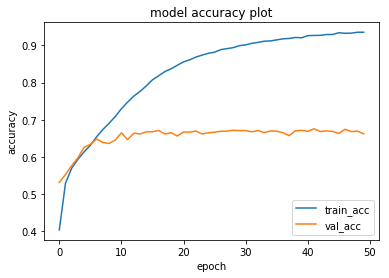

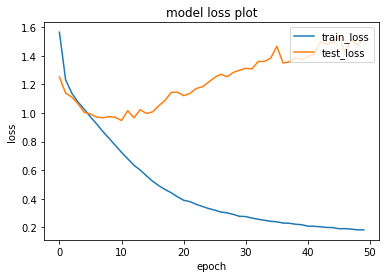


Evaluating model on test data
3589/3589 [==============================] - 1s 169us/step

Test Accuracy: 65.23%

Loss: 1.64


In [8]:
# Save the model in HDF5 file 
model.save('models/deep_model.h5')

# Output training results

train_acc = history.history['acc']
val_acc = history.history['val_acc']

print("\n===> Results <===")
print("\nTraining Accuracy: %.2f%%" % ((train_acc[-1])*100))
print("Validation Accuracy: %.2f%%" % ((val_acc[-1])*100))

# Plot accuracy result
plt.plot(train_acc)
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.plot(val_acc)
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='lower right')
plt.show()

# Plot loss result
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper right')
plt.show()

#Evaluate model performance on test data

print("\nEvaluating model on test data")
scores = model.evaluate(X_test,y_test)

print("\nTest Accuracy: %.2f%%" % (scores[1]*100))
print("\nLoss: %.2f" % (scores[0]))


Confusion matrix for above results:


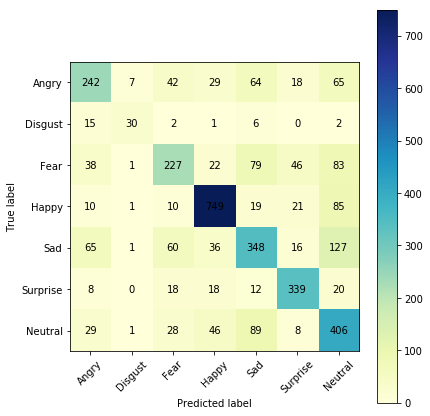

In [10]:
print("\nConfusion matrix for above results:")

y_prob = model.predict(X_test, batch_size=50, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
   # matplotlib.rcParams.update({'font.size': 14})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')

    ticks = np.arange(len(EMOTIONS))
    ax.set_xticks(ticks)
    ax.set_xticklabels(EMOTIONS, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(EMOTIONS)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)